### SVD and TSVD

In [337]:
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [338]:
#forward mapping for convolution
def create_fmap_con(n=4,d=1):
    weights = np.zeros(d)
    weights[0:n] = 1./n
    A = np.zeros([d,d])
    for i in range(0,d):
        A[i,:] = np.roll(weights,i-int(n/2))
    return A

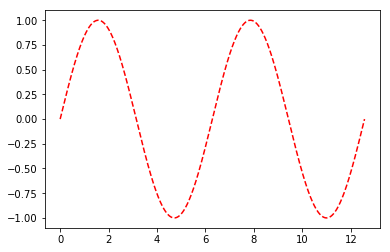

In [339]:
t = np.linspace(0,4*np.pi,1000)
x = np.sin(t)
plt.plot(t,x,'r--')
plt.show()

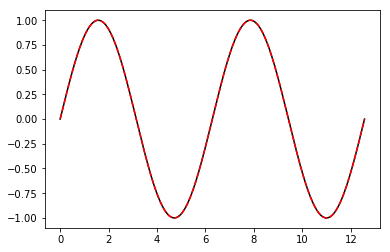

In [340]:
#create forward mapping for convolution
#no smoothing
A = create_fmap_con(n=1,d=len(x))
y = np.dot(A,x)
plt.plot(t,x,'k')
plt.plot(t,y,'r--')
plt.show()

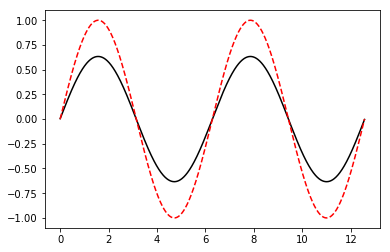

In [341]:
#create forward mapping for convolution with greater width of smoothing
A = create_fmap_con(n=int(len(x)/4+1),d=len(x))
y = np.dot(A,x)
plt.plot(t,y,'k')
plt.plot(t,x,'r--')
plt.show()

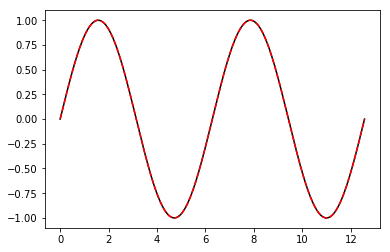

In [342]:
#invert noise-free case
plt.plot(t,np.dot(np.linalg.inv(A),y),'k')
plt.plot(t,x,'r--')
plt.show()

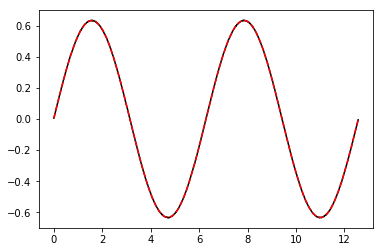

In [343]:
#add almost undetectable noise
y_noisy = y+np.random.normal(0,0.001,size=len(y))
plt.plot(t,y_noisy,'k')
plt.plot(t,y,'r--')
plt.show()

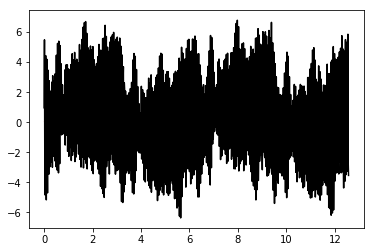

In [344]:
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(np.linalg.inv(A),y_noisy),'k')
plt.show()

In [345]:
#note: large condition number (ill-conditioned!)
np.linalg.cond(np.linalg.inv(A))

56672.146780291674

In [346]:
#same as condition number of A
np.linalg.cond(A)

56672.146780212592

#### Truncated approach

In [347]:
from scipy.sparse.linalg import svds

In [348]:
U, s, VT = svds(A, k=300)
V = VT.T

In [349]:
#svds returns in increasing order, want decreasing...
s = np.flip(s,axis=0)
S = np.diag(s)

In [350]:
U = np.flip(U,axis=1)
V = np.flip(V,axis=1)

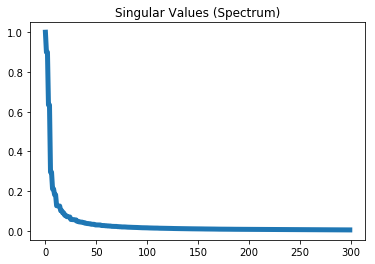

In [351]:
plt.plot(s,linewidth=5)
plt.title('Singular Values (Spectrum)')
plt.show()

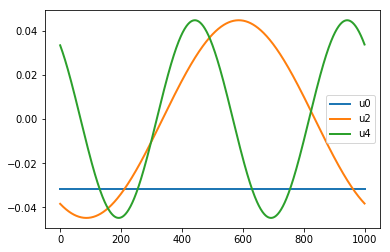

In [293]:
plt.plot(U[:,0],label='u0',linewidth=2)
#plt.plot(U[:,1],label='u1',linewidth=2)
plt.plot(U[:,2],label='u2',linewidth=2)
#plt.plot(U[:,3],label='u3',linewidth=2)
plt.plot(U[:,4],label='u4',linewidth=2)
plt.legend()
plt.show()

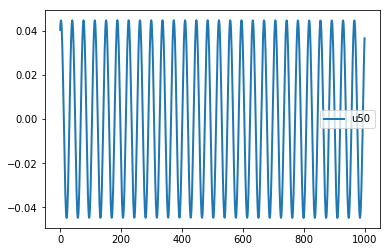

In [276]:
plt.plot(U[:,50],label='u50',linewidth=2)
#plt.plot(u[:,-],label='u2')
#plt.plot(u[:,-3],label='u3')
#plt.plot(u[:,-4],label='u4')
plt.legend()
plt.show()

In [278]:
#verify
A_svd = U@S@V.T

In [279]:
A_svd.shape

(1000, 1000)

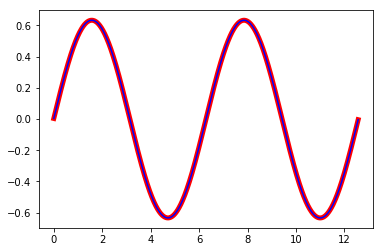

In [280]:
plt.plot(t,np.dot(A_svd,x),'r',linewidth=5)
plt.plot(t,y,'b')
#plt.plot(t,x,'r--')
plt.show()

#### Invert

In [281]:
Apinv = V@np.linalg.inv(S)@U.T

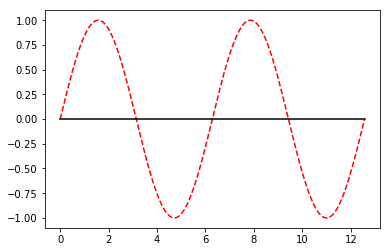

In [282]:
k = 1
Apinv = V[:,:k]@np.linalg.inv(S[:k,:k])@U[:,:k].T
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(Apinv,y_noisy),'k')
plt.show()

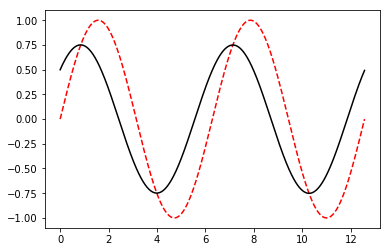

In [283]:
k = 4
Apinv = V[:,:k]@np.linalg.inv(S[:k,:k])@U[:,:k].T
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(Apinv,y_noisy),'k')
plt.show()

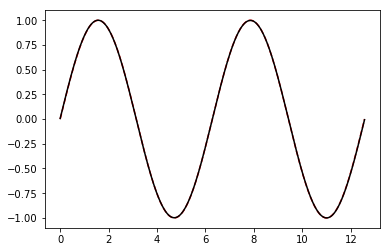

In [284]:
k = 5
Apinv = V[:,:k]@np.linalg.inv(S[:k,:k])@U[:,:k].T
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(Apinv,y_noisy),'k')
plt.show()

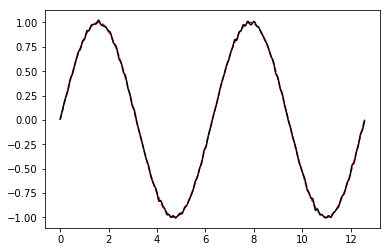

In [285]:
k = 100
Apinv = V[:,:k]@np.linalg.inv(S[:k,:k])@U[:,:k].T
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(Apinv,y_noisy),'k')
plt.show()

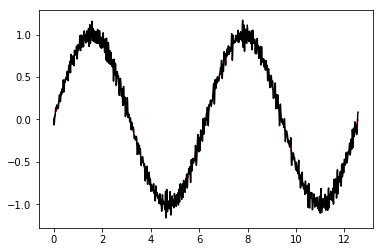

In [286]:
k = 300
Apinv = V[:,:k]@np.linalg.inv(S[:k,:k])@U[:,:k].T
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(Apinv,y_noisy),'k')
plt.show()

#### Loop

In [331]:
ks = np.linspace(1,300,300)
xs = np.zeros((len(ks),len(x)))
x_norms = np.zeros(len(ks))
x_norms_1 = np.zeros(len(ks))
data_norms = np.zeros(len(ks))

for k in range(1,len(ks)+1):
    
    i = k-1
    #invert
    Apinv = V[:,:k]@np.linalg.inv(S[:k,:k])@U[:,:k].T
    xs[i,:] = np.dot(Apinv,y_noisy)
    
    #calc norms
    x_norms[i] = np.linalg.norm(xs[i,:],2)
    x_norms_1[i] = np.linalg.norm(xs[i,:],1)
    A_svd = U@S@V.T
    data_norms[i] = np.linalg.norm(y_noisy - np.dot(A,xs[i,:]))

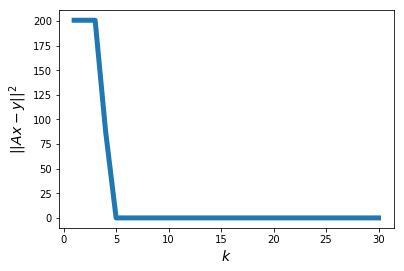

In [332]:
n = 30
plt.plot(ks[0:n],data_norms[0:n]**2,linewidth=5)
plt.ylabel(r'$||Ax-y||^2$',fontsize=14)
plt.xlabel(r'$k$',fontsize=14)
plt.show()

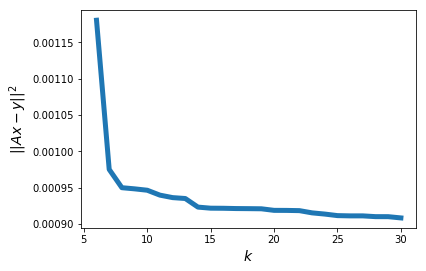

In [333]:
n = 30
plt.plot(ks[5:n],data_norms[5:n]**2,linewidth=5)
plt.ylabel(r'$||Ax-y||^2$',fontsize=14)
plt.xlabel(r'$k$',fontsize=14)
plt.show()